In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('airfoil_self_noise.dat',sep='\t')

In [3]:
data

,800,0,0.3048,71.3,0.00266337,126.201
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571
...,...,...,...,...,...,...
1497,2500,15.6,0.1016,39.6,0.052849,110.264
1498,3150,15.6,0.1016,39.6,0.052849,109.254
1499,4000,15.6,0.1016,39.6,0.052849,106.604
1500,5000,15.6,0.1016,39.6,0.052849,106.224


In [4]:
df=pd.read_csv('airfoil_self_noise.dat',sep='\t',header=None)

In [5]:
df.head

<bound method NDFrame.head of          0     1       2     3         4        5
0      800   0.0  0.3048  71.3  0.002663  126.201
1     1000   0.0  0.3048  71.3  0.002663  125.201
2     1250   0.0  0.3048  71.3  0.002663  125.951
3     1600   0.0  0.3048  71.3  0.002663  127.591
4     2000   0.0  0.3048  71.3  0.002663  127.461
...    ...   ...     ...   ...       ...      ...
1498  2500  15.6  0.1016  39.6  0.052849  110.264
1499  3150  15.6  0.1016  39.6  0.052849  109.254
1500  4000  15.6  0.1016  39.6  0.052849  106.604
1501  5000  15.6  0.1016  39.6  0.052849  106.224
1502  6300  15.6  0.1016  39.6  0.052849  104.204

[1503 rows x 6 columns]>

Data Set Information:

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.


Attribute Information:

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.

In [6]:
df.columns=['Frequency','Angle of attack','Chord length','Free-stream velocity','Suction side','sound pressure']

In [7]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,sound pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [8]:
X=df.iloc[:,:-1]
y=df.iloc[::,-1]

In [9]:
X

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849
1499,3150,15.6,0.1016,39.6,0.052849
1500,4000,15.6,0.1016,39.6,0.052849
1501,5000,15.6,0.1016,39.6,0.052849


In [10]:
y

0       126.201
1       125.201
2       125.951
3       127.591
4       127.461
         ...   
1498    110.264
1499    109.254
1500    106.604
1501    106.224
1502    104.204
Name: sound pressure, Length: 1503, dtype: float64

In [11]:
import seaborn as sns

In [12]:
##first Do train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


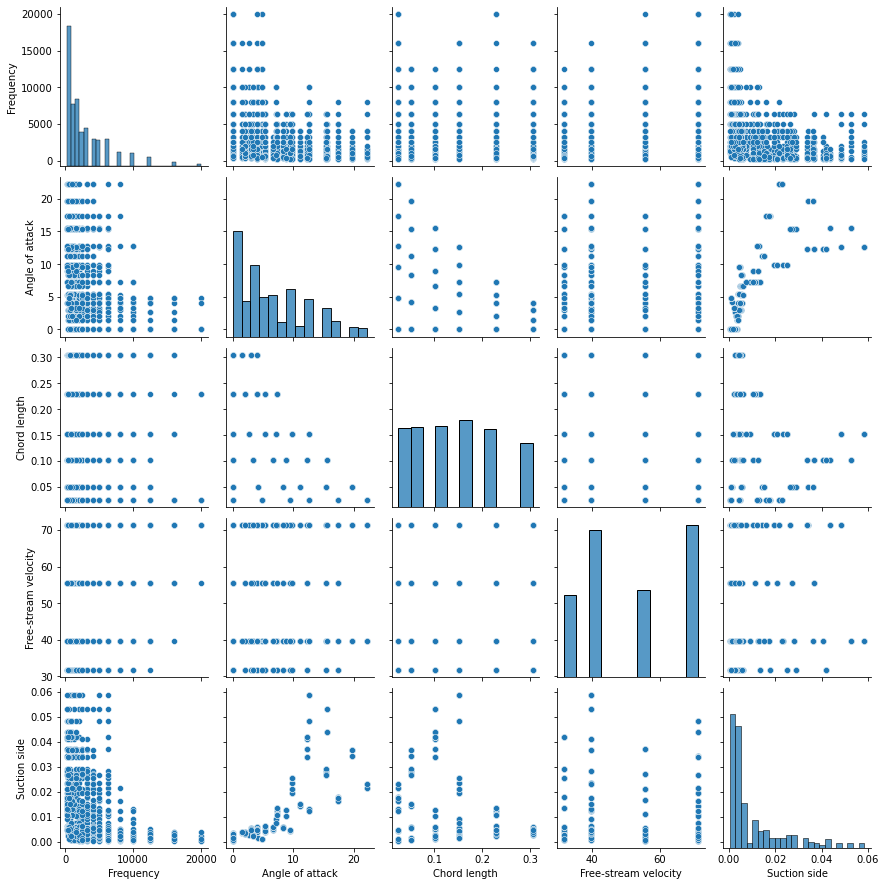

In [13]:
sns.pairplot(X_train)

In [14]:
import matplotlib.pyplot as plt

In [15]:
X_train.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
Frequency,1.000000,-0.273327,-0.000324,0.125247,-0.239878
Angle of attack,-0.273327,1.000000,-0.498257,0.058603,0.762567
Chord length,-0.000324,-0.498257,1.000000,0.013061,-0.220849
Free-stream velocity,0.125247,0.058603,0.013061,1.000000,-0.000519
Suction side,-0.239878,0.762567,-0.220849,-0.000519,1.000000


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency'>

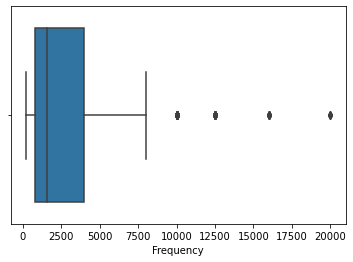

In [16]:
##checking outloer in frequency column
sns.boxplot(X_train['Frequency'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='sound pressure'>

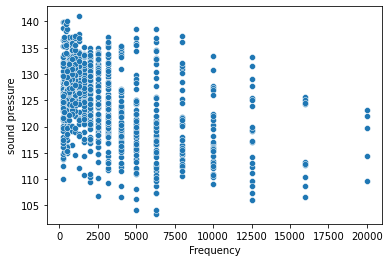

In [17]:
##correlation between Frequency and outpou feature
sns.scatterplot(X_train['Frequency'],y)

In [18]:
len(df['sound pressure'].unique())

1456

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sound pressure'>

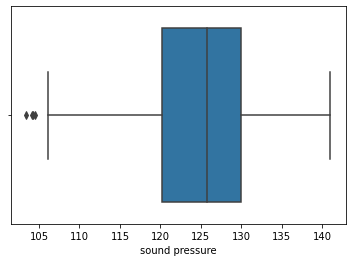

In [19]:
##checking outloer in frequency column
sns.boxplot(df['sound pressure'])

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_regressor=LinearRegression()
lin_regressor.fit(X_train,y_train)
msc=cross_val_score(lin_regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
print(msc)
print(np.mean(msc))

[-23.86411415 -18.77845803 -23.14986364 -26.27742868 -25.95273856]
-23.604520611637486


# Ridge Regression

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()

params={'alpha':[1e-1536,36,36,63,63,63,63,1e-10,1e-8,5,10,20,1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
ridge_regressor=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0, 36, 36, 63, 63, 63, 63, 1e-10, 1e-08, 5,
                                   10, 20, 1e-15, 1e-10, 1e-08, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [22]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.001}
-23.60289127103825


# Lasso Regression

In [23]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()

params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,36,36,63,63,63,63,10,20,1e-8,1e-3,1e-2,1,5,10,20,1e-8,1e-3,1e-2,1,5,10,20]}
lasso_regressor=GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9256.150616415085, tolerance: 3.811589243499877
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9760.405262038043, tolerance: 3.8427835972156523
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9330.435434744284, tolerance: 3.7589641618535987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 36,
                                   36, 63, 63, 63, 63, 10, 20, 1e-08, 0.001,
                                   0.01, 1, 5, 10, 20, 1e-08, 0.001, 0.01, 1, 5,
                                   10, 20]},
             scoring='neg_mean_squared_error')

In [24]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-23.604520590618996


# KNN Regression

In [25]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train,y_train)


KNeighborsRegressor()

# 5.4 Support Vector Regressor

In [26]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
svr = SVR()
svr.fit(X_train, y_train)


SVR()

# Decesion Tree

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


# Prediction

In [28]:
prediction_linear=lin_regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,prediction_linear)
print(r2_score1)

0.5124474986138432


In [29]:
prediction_ridge=ridge_regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,prediction_ridge)
print(r2_score1)

0.5125022911438959


In [30]:
prediction_lasso=lasso_regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,prediction_lasso)
print(r2_score1)

0.5124475019453937


In [31]:
prediction_KNN=neigh.predict(X_test)
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, prediction_KNN)
r2 = r2_score(y_test, prediction_KNN)
print(r2_score1)


0.5124475019453937


In [32]:
prediction_svr = svr.predict(X_test)
mae = mean_absolute_error(y_test, prediction_svr)
r2 = r2_score(y_test, prediction_svr)
print(r2)


0.11649932904323934


In [33]:
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)
print(r2)
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

0.9265871812079849
R2 Score value: 0.9266
MAE value: 1.3577


In [34]:
import pickle
pickle.dump(rf,open('model_1.pkl','wb'))

In [35]:
pickled_model = pickle.load(open('model_1.pkl','rb'))
pickled_model.predict(X_test)

array([124.214  , 119.2577 , 119.20162, 135.93382, 134.42668, 123.5725 ,
       123.85572, 133.48367, 133.94741, 127.37022, 126.50238, 112.83948,
       133.24176, 132.56389, 125.0905 , 108.13266, 130.23786, 130.75471,
       128.45166, 123.2214 , 125.28371, 126.75817, 111.02184, 125.96506,
       124.22437, 125.79536, 129.57756, 131.17425, 109.03352, 130.94489,
       131.82885, 121.91285, 128.27143, 119.25463, 119.34456, 132.70688,
       133.82632, 129.91542, 120.73102, 112.16294, 125.38582, 134.90885,
       127.08227, 121.60498, 127.34929, 134.62113, 130.00252, 118.93827,
       121.52387, 133.93385, 132.43861, 114.18186, 129.68246, 126.50864,
       126.96386, 120.68105, 123.65595, 129.36324, 122.50844, 118.65665,
       126.06033, 134.47918, 130.46606, 132.99219, 117.67621, 125.26466,
       123.60879, 120.63854, 126.64449, 129.14991, 128.53208, 129.69805,
       128.66569, 116.93874, 129.35739, 127.98298, 130.69293, 132.6037 ,
       134.13832, 136.16593, 124.65902, 120.03559, 